In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers

In [ ]:
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# scaling
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape[0], x_test.shape[0]

11490434/11490434 [==============================] - 0s 0us/step


(60000, 10000)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=512, epochs=10, validation_split=0.1)

Epoch 1/10
106/106 [==============================] - 61s 557ms/step - loss: 0.7441 - accuracy: 0.7814 - val_loss: 0.1476 - val_accuracy: 0.9597
Epoch 2/10
106/106 [==============================] - 53s 501ms/step - loss: 0.1804 - accuracy: 0.9458 - val_loss: 0.0888 - val_accuracy: 0.9767
Epoch 3/10
106/106 [==============================] - 51s 484ms/step - loss: 0.1273 - accuracy: 0.9608 - val_loss: 0.0677 - val_accuracy: 0.9818
Epoch 4/10
106/106 [==============================] - 51s 480ms/step - loss: 0.1043 - accuracy: 0.9686 - val_loss: 0.0584 - val_accuracy: 0.9855
Epoch 5/10
106/106 [==============================] - 49s 462ms/step - loss: 0.0911 - accuracy: 0.9719 - val_loss: 0.0527 - val_accuracy: 0.9865
Epoch 6/10
106/106 [==============================] - 50s 473ms/step - loss: 0.0803 - accuracy: 0.9752 - val_loss: 0.0476 - val_accuracy: 0.9878
Epoch 7/10
106/106 [==============================] - 52s 494ms/step - loss: 0.0726 - accuracy: 0.9776 - val_loss: 0.0437 - val_ac

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
test_scores

313/313 - 4s - loss: 0.0373 - accuracy: 0.9867 - 4s/epoch - 12ms/step


[0.03730423375964165, 0.9866999983787537]

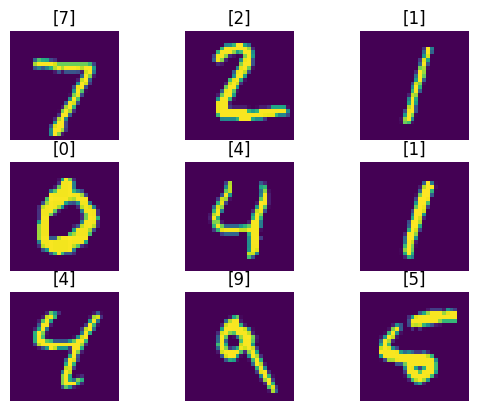

In [ ]:
def format_label(label):
  return [i for i, val in enumerate(label[0]) if val==1]

import matplotlib.pyplot as plt
for i, img in enumerate(x_test[:9]):
  ax = plt.subplot(3, 3, i + 1)
  img = img.astype('float32')*255
  plt.imshow(img.astype("uint8"))
  x = np.expand_dims(img, axis=0)
  label = model(x)
  plt.title(format_label(label))
  plt.axis("off")